**AG News Classification Dataset**
News articles of class "world", "sports", "business", and "Science"

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds


In [ ]:
from datasets import load_dataset

# Load the AG News dataset from Hugging Face
dataset = load_dataset('ag_news')

# Split into train and test sets
ds_train = dataset['train']
ds_test = dataset['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
ds_train

Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

In [ ]:
# Display a sample
print(ds_train[0])

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


In [ ]:
# Preprocess function to tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts_train = [item['text'] for item in ds_train]
labels_train = [item['label'] for item in ds_train]

texts_test = [item['text'] for item in ds_test]
labels_test = [item['label'] for item in ds_test]

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts_train)
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

# Pad sequences
maxlen = 200
X_train = pad_sequences(sequences_train, maxlen=maxlen)
X_test = pad_sequences(sequences_test, maxlen=maxlen)

y_train = np.array(labels_train)
y_test = np.array(labels_test)


In [ ]:
y_train

array([2, 2, 2, ..., 1, 1, 1])

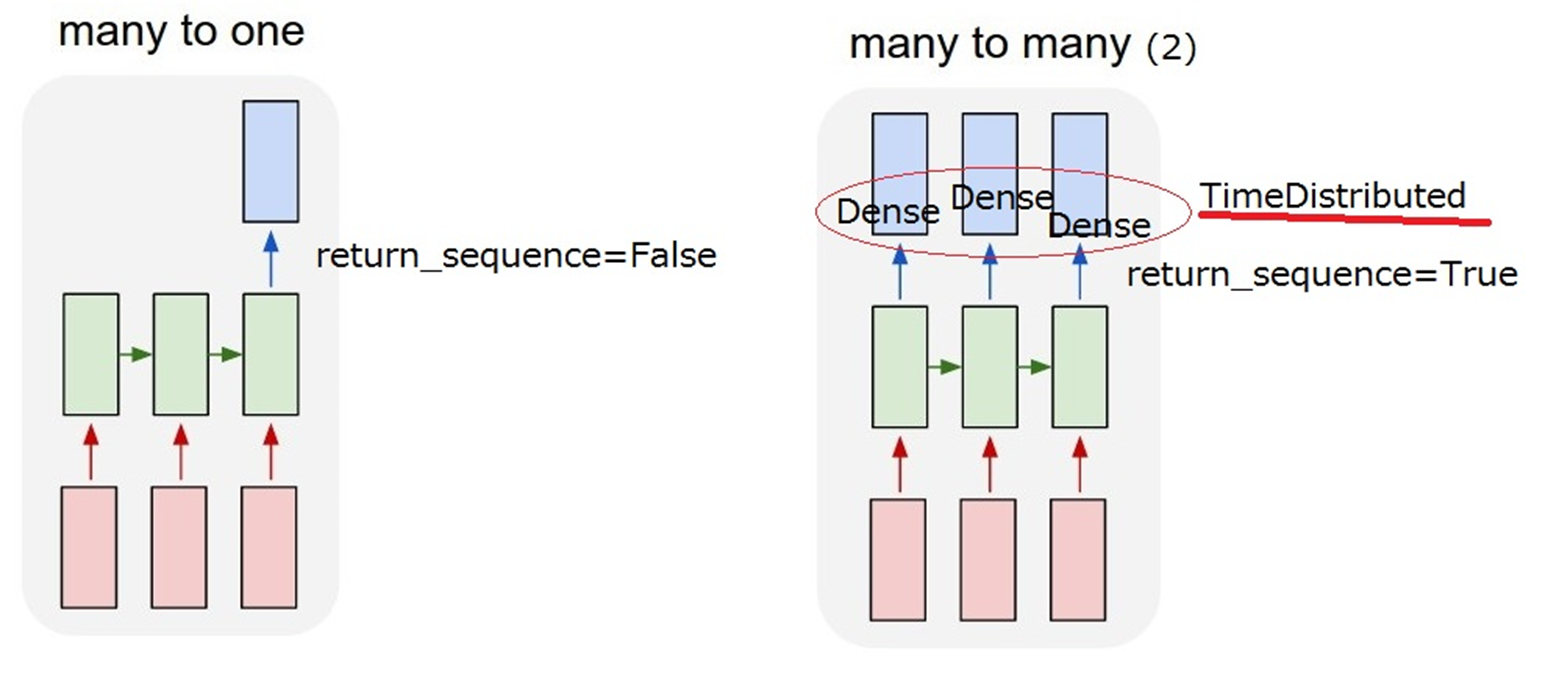

In [ ]:
# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    tf.keras.layers.SimpleRNN(64, return_sequences=False),

    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes for AG News
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 176s 92ms/step - accuracy: 0.7357 - loss: 0.6421 - val_accuracy: 0.8884 - val_loss: 0.3502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 91ms/step - accuracy: 0.9027 - loss: 0.3033 - val_accuracy: 0.8974 - val_loss: 0.3509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 91ms/step - accuracy: 0.9247 - loss: 0.2400 - val_accuracy: 0.8903 - val_loss: 0.3678
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 91ms/step - accuracy: 0.9355 - loss: 0.2006 - val_accuracy: 0.8913 - val_loss: 0.3659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 172s 92ms/step - accuracy: 0.9449 - loss: 0.1695 - val_accuracy: 0.8995 - val_loss: 0.3617


In [ ]:

history.history

{'accuracy': [0.8412833213806152,
  0.9005666375160217,
  0.9211666584014893,
  0.9320666790008545,
  0.9410499930381775],
 'loss': [0.44882482290267944,
  0.3101680278778076,
  0.24860113859176636,
  0.21095015108585358,
  0.17982648313045502],
 'val_accuracy': [0.8884210586547852,
  0.8973684310913086,
  0.8902631402015686,
  0.8913158178329468,
  0.8994736671447754],
 'val_loss': [0.3501785099506378,
  0.35085329413414,
  0.36777910590171814,
  0.365876704454422,
  0.3617136776447296]}

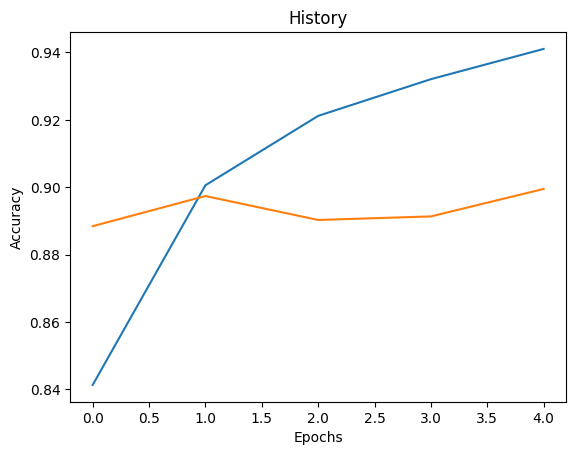

In [ ]:
# Plot the accuracy
import matplotlib.pyplot as plt

fig = plt.plot(history.history['accuracy'])
fig = plt.plot(history.history['val_accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")


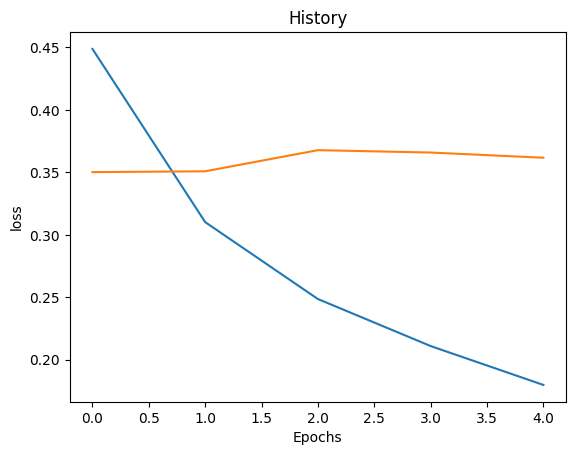

In [ ]:
# Plot the accuracy
fig = plt.plot(history.history['loss'])
fig = plt.plot(history.history['val_loss'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("loss")

238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step


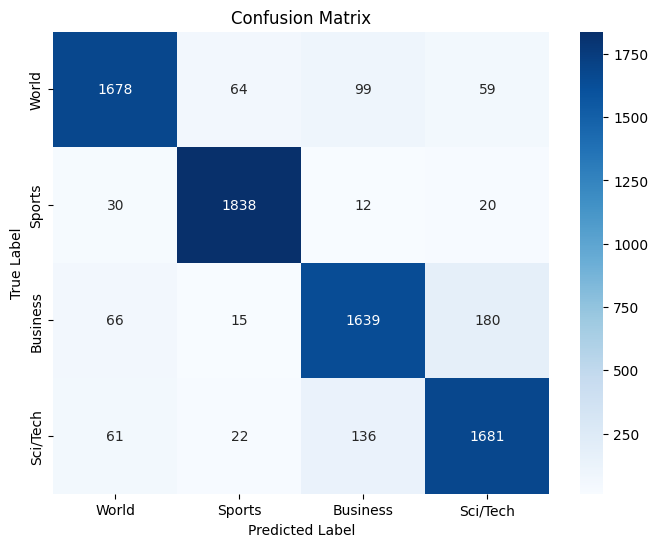

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
